# TEAM CHALLENGE **PIPELINES**

Voy a empezar con los datos del dataset de **Nutrición**

## Problema de negocio y tareas

**Problema de clasificación**: Predecir qué tipo de alimento es dadas a una serie de características.  
**Problema de regresión**: Predecir cuántas kcal tiene un alimento dependiendo de unas variables

## Importación de módulos

In [26]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toolbox_ML as tb

from sklearn.model_selection import train_test_split

## Carga de datos y primera visualización

In [3]:
df = pd.read_csv('./data/nutrition.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Hay nulos en 3 columnas: **CommonName, MfgName** y **ScientificName**.  
Voy a mostrar el porcentaje de nulos con nuestra función del ToolBox.

In [11]:
var_nulos = 'CommonName', 'MfgName', 'ScientificName'
tb.describe_df(df[['CommonName', 'MfgName', 'ScientificName']])

,COL_N,CommonName,MfgName,ScientificName
0,DATA_TYPE,object,object,object
1,MISSINGS (%),87.665352,81.898352,91.50615
2,UNIQUE_VALUES,444,93,470
3,CARDIN (%),5.14,1.07,5.44


Cuando hagamos el split de **Train** y **Test** las eliminamos ya que es muy alto el porcentaje de nulos.  
Por lo demás, es una variable con bastantes columnas por de tipo numérica, la gran mayoría, y alguna de tipo 'object'.

## Problema de clasificación

En este problema pretendemos realizar un modelo de clasificación multiclase, prediciendo qué tipo de alimento es dependiendo de unas características

### Separación de Train y Test

In [13]:
train_clf, test_clf = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
print('Longitud de Train -->', len(train_clf))
print('Longitud de Test -->', len(test_clf))

Longitud de Train --> 6894
Longitud de Test --> 1724


### MiniEda  

#### Creación de la Target y visualización de su distribución

In [21]:
target = 'FoodGroup'

Creo la gráfica para poder poner las etiquetas del eje x en 90 grados y se lea bien. He rescatado parte de la función de *Bootcampviztools*

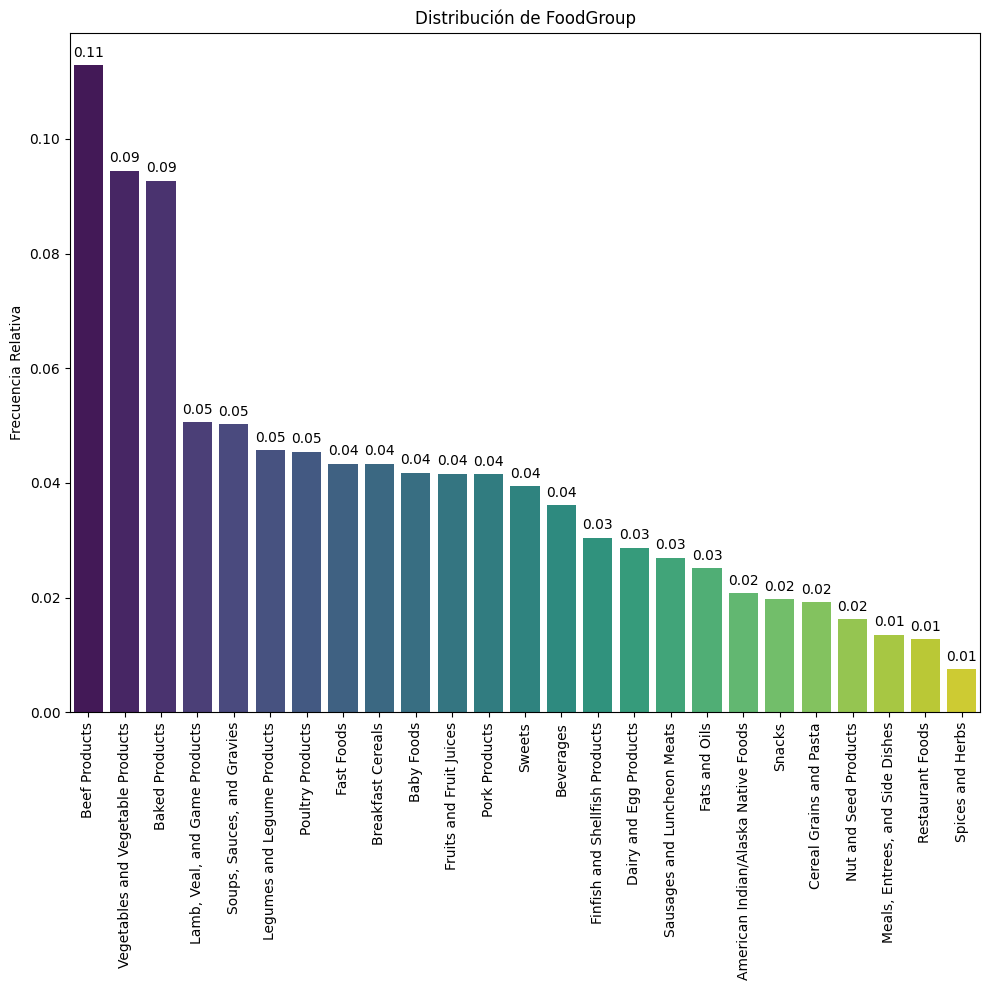

In [39]:
total = train_clf[target].value_counts().sum()
serie = train_clf[target].value_counts().apply(lambda x: x / total)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=serie.index, y=serie.values, palette='viridis', hue=serie.index, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.xticks(rotation=90)

ax.set_ylabel('Frecuencia Relativa')
ax.set_xlabel('')
ax.set_title('Distribución de FoodGroup')

plt.tight_layout()
plt.show()